# Η Ισχύς εν τη Ενώση

* Προσαρμογή από το βιβλίο του Wes McKinney *Python for Data Analysis*, 2η έκδοση, O'Reilly, 2017.

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

# Περί Τίνος Πρόκειται;

* Η [Ομοσπονδιακή Εκλογική Επιτροπή (Federal Election Commission)](https://www.fec.gov/) δημοσιεύει δεδομένα για τις δωρεές που δίνονται στις εκλογικές εκστρατίες στις ΗΠΑ.

* Τα δεδομένα είναι διαθέσιμα στο https://www.fec.gov/data/browse-data/?tab=bulk-data.

* Θα χρησιμοποιήσουμε τα δεδομένα για το 2012 (απλώς γιατί είναι μικρότερα σε όγκο).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

matplotlib.style.use('ggplot')
pd.set_option("display.max_columns", None)

* Θα διερευνήσουμε τις [ατομικές συνεισφορές για το 2012](https://www.fec.gov/files/bulk-downloads/2012/indiv12.zip).

* Τα δεδομένα περιλαμβάνουν τα ονόματα των δωρητών, διεύθυνση, επάγγελμα, και το ποσό της δωρεάς.

* Το αρχείο των δεδομένων είναι ξεχωριστό από το [αρχείο των επικεφαλίδων](https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv) που θα πρέπει να κατεβάσουμε ξεχωριστά.

In [2]:
headers = pd.read_csv('https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv')
headers

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID


* Τώρα μπορούμε να διαβάσουμε και τα ίδια τα δεδομένα.

In [3]:
fec = pd.read_csv('itcont.txt.zip', sep="|", nrows=10, names=headers.columns)
fec.head(5)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,1192011,250,NaN,INCA210,713442,NaN,NaN,4030920111137082784
1,C00377051,N,M2,NaN,11930332597,15,IND,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,1102011,350,NaN,INCA161,713448,NaN,NaN,4030920111137082785
2,C00377051,N,M2,NaN,11930332597,15,IND,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,1102011,300,NaN,INCA164,713448,NaN,NaN,4030920111137082786
3,C00487447,N,M2,NaN,11930332701,15,IND,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011,283,NaN,PR1611594225441,713467,NaN,P/R DEDUCTION ($283.33 SEMI-MONTHLY),4030920111137082792
4,C00487447,N,M2,NaN,11930332701,15,IND,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,1312011,250,NaN,PR675291525441,713467,NaN,P/R DEDUCTION ($250.00 SEMI-MONTHLY),4030920111137082793


* Το αρχείο που θα διαβάσουμε είναι μεγάλο.

* Όταν διαβάζουμε ένα αρχείο, διευκολύνουμε το pandas αν του δώσουμε τους τύπους δεδομένων των στηλών.

* Τους τύπους δεδομένων τους δίνουμε με ένα λεξικό. Εδώ μας ενδιαφέρει το ποσό της δωρεάς, που θα δηλώσουμε ότι είναι αριθμός, ενώ για όλα τα υπόλοιπα θα τα χειριστούμε ως συμβολοσειρές.

In [4]:
data_types = { header: str for header in headers }
data_types['TRANSACTION_AMT'] = float
data_types

{'CMTE_ID': str,
 'AMNDT_IND': str,
 'RPT_TP': str,
 'TRANSACTION_PGI': str,
 'IMAGE_NUM': str,
 'TRANSACTION_TP': str,
 'ENTITY_TP': str,
 'NAME': str,
 'CITY': str,
 'STATE': str,
 'ZIP_CODE': str,
 'EMPLOYER': str,
 'OCCUPATION': str,
 'TRANSACTION_DT': str,
 'TRANSACTION_AMT': float,
 'OTHER_ID': str,
 'TRAN_ID': str,
 'FILE_NUM': str,
 'MEMO_CD': str,
 'MEMO_TEXT': str,
 'SUB_ID': str}

* Οπότε τώρα ας διαβάσουμε όλα τα δεδομένα.

In [5]:
fec = pd.read_csv('itcont.txt.zip', 
                  sep="|", 
                  names=headers.columns,
                  dtype=data_types)

fec.shape

(3372139, 21)

In [6]:
fec.sample(10)

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
833975,C00003418,A,M5,NaN,12970788334,15,IND,"HALLAM, JOHN F. MR.",ROCKVILLE,MD,20852,RETIRED,RETIRED,04062011,500.0,NaN,2011M05L11AI01657,772096,NaN,NaN,4032120121153485771
2438060,C00431445,A,M10,G2012,13943632404,15,IND,"HUNTER, MARY",SEATTLE,WA,98118,RETIRED,RETIRED,09302012,250.0,NaN,C23701334,897086,NaN,NaN,4121620131202788478
3221586,C00431171,A,30G,G2012,14961415686,15,IND,"GRIFFIN, ROBERT",EAGLE RIVER,AK,99577,ALASKA AIRLINES,AIRLINE,10292012,500.0,NaN,SA17.4038670,933479,NaN,NaN,4063020141216009841
1318895,C00000901,A,M3,NaN,12971296195,15,IND,"LACAVA, GEORGE A",CROMWELL,CT,06416,TRILACON DEVELOPMENT CORP/BUILDER,BUILDER,02072012,250.0,NaN,45978EDBBC4BB65EAEC4,791410,NaN,NaN,4070620121158357550
89961,C00450148,A,Q1,P2012,11931670438,22Y,IND,"DORN, ANDREW",LANCASTER,NY,14086,NaN,NaN,03042011,300.0,NaN,10408.E6495,731761,NaN,NaN,4062020111140924372
2161891,C00518241,A,12R,R2012,13960712772,15,IND,"DILLARD, RAYMOND H",MEXIA,TX,76667,DILLARD FINANCIAL SERVICES,PRINCIPAL OWNER,07052012,1500.0,NaN,SA11AI.4555,853955,NaN,NaN,4020120131180549091
1179629,C00346353,A,M4,NaN,12951789428,15,IND,"HAY, JOHN C. MR.",FALLS CHURCH,VA,22046,OLDCASTLE MATERIALS GROUP,VICE PRESIDENT - GOVERNMENT RELATIONS,03222012,5000.0,NaN,SA11AI.13535,784590,NaN,NaN,4060720121156731325
2291648,C00431056,A,12P,G,13020190126,15,IND,"GEPHARDT, RICHARD A",MC LEAN,VA,22102,GEPHARDT GROUP,PRESIDENT & CEO,02012012,500.0,NaN,SA0426095612365,868996,NaN,NaN,2042620131188447023
3220444,C00431171,A,M7,P2012,13942730425,15,IND,"MUSE, RALPH BUCKLEY",DALLAS,TX,75248,AUTOSEIS INC,MANAGER,06292012,1000.0,NaN,SA17.1343428,896735,NaN,NaN,4121120131200182901
1334229,C00384701,N,M6,NaN,12952154942,15,IND,"CANDELL, PETER",SCARSDALE,NY,10583,JPMORGANCHASE,INVESTMENT BANKING,05112012,250.0,NaN,SA11AI-30136-31114-C,790876,NaN,NaN,4062720121157994564


* Δυστυχώς παρατηρούμε ότι δεν υπάρχει η πληροφορία για τον υποψήφιο στον οποίο απευθύνεται μια δωρεά. 

* Οι δωρεές δίνονται σε επιτροπές (commitees).

* Το αρχείο των δωρεών υποδεικνύει την εν λόγω επιτροπή με τον κωδικό `CMTE_ID`.

* Επομένως θα πρέπει να στραφούμε σε αυτές και να διαβάσουμε το [αρχείο των επιτροπών](https://www.fec.gov/files/bulk-downloads/2012/cm12.zip).

* Όπως και πριν, θα πρέπει να διαβάσουμε ξεχωριστά [το αρχείο των επικεφαλίδων](https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cm_header_file.csv).

In [7]:
cm_headers =  pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cm_header_file.csv')
cm_headers

,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID


* Έχοντας διαβάσει τις επικεφαλίδες, μπορούμε να διαβάσουμε και τα ίδια τα δεδομένα των επιτροπών.

In [8]:
cm = pd.read_csv('cm.txt', 
                  sep="|", 
                  names=cm_headers.columns)
print(cm.shape)
cm.head(5)

(14455, 15)


,CMTE_ID,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000042,ILLINOIS TOOL WORKS INC. FOR BETTER GOVERNMENT...,"LYNCH, MICHAEL J. MR.",3600 WEST LAKE AVENUE,NaN,GLENVIEW,IL,60026.0,B,Q,NaN,Q,C,ILLINOIS TOOL WORKS INC.,NaN
1,C00000059,HALLMARK CARDS PAC,GREG SWARENS,2501 MCGEE,MD#288,KANSAS CITY,MO,64108.0,U,Q,UNK,M,C,NaN,NaN
2,C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001.0,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
3,C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107.0,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
4,C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612.0,U,Q,UNK,Q,T,MEDICAL ASS'N; KANSAS [AMPAC],NaN


* Για να συνδυάσουμε τα δεδομένα των επιτροπών με τα δεδομένα των δωρεών, θα πρέπει να τα *ενώσουμε* (join).

* Για να ενώσουμε δύο `DataFrame`s στο pandas χρησιμοποιούμε τη μέθοδο `merge()`.

In [9]:
fec = pd.merge(fec, 
               cm[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')

print(fec.shape)
fec.head(5)

(3372139, 23)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID
0,C00425645,N,M2,NaN,11930332238,15,IND,"MYERS, WALTER",TUSTIN RANCH,CA,92782,MICROSOFT,CONSULTANT,01192011,250.0,NaN,INCA210,713442,NaN,NaN,4030920111137082784,"ATLAS PAC, FEDERAL",NaN
1,C00377051,N,M2,NaN,11930332597,15,IND,"ORROCK, MICHELLE",ELK GROVE,CA,95624,C & M INSURANCE,INSURANCE AGENT,01102011,350.0,NaN,INCA161,713448,NaN,NaN,4030920111137082785,SACRAMENTO VALLEY LINCOLN CLUB FEDERAL,NaN
2,C00377051,N,M2,NaN,11930332597,15,IND,"SCHACHTERLE, DIANE",CARMICHAEL,CA,95608,ACRI,DIRECTOR OF POLICY,01102011,300.0,NaN,INCA164,713448,NaN,NaN,4030920111137082786,SACRAMENTO VALLEY LINCOLN CLUB FEDERAL,NaN
3,C00487447,N,M2,NaN,11930332701,15,IND,"CLEVENGER, DON JEFFERY",SUNNYVALE,TX,75182,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,01312011,283.0,NaN,PR1611594225441,713467,NaN,P/R DEDUCTION ($283.33 SEMI-MONTHLY),4030920111137082792,ONCOR POLITICAL ACTION COMMITTEE OF ONCOR ELEC...,NaN
4,C00487447,N,M2,NaN,11930332701,15,IND,"GREER, JAMES ALAN",ROANOKE,TX,76262,ONCOR ELECTRIC DELIVERY,SR VICE PRESIDENT,01312011,250.0,NaN,PR675291525441,713467,NaN,P/R DEDUCTION ($250.00 SEMI-MONTHLY),4030920111137082793,ONCOR POLITICAL ACTION COMMITTEE OF ONCOR ELEC...,NaN


* Δυστυχώς παρατηρούμε πάλι ότι δεν βλέπουμε τα πλήρη στοιχεία του υποψηφίου για τον οποίο συγκεντρώνει χρήματα η κάθε επιτροπή. 

* Υπάρχει μόνο ο κωδικός του, `CAND_ID`.

* Οπότε πρέπει να στραφούμε στο αρχείο των [υποψηφίων](https://www.fec.gov/files/bulk-downloads/2012/cn12.zip).

* Και, όπως και πριν, θα πρέπει να πάρουμε και τις αντίστοιχες [επικεφαλίδες](https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv).


In [10]:
cn_headers =  pd.read_csv('https://www.fec.gov/data/browse-data/files/bulk-downloads/data_dictionaries/cn_header_file.csv')
cn_headers

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP


* Διαβάζουμε τώρα και το αρχείο των υποψηφίων.

In [11]:
cn = pd.read_csv('cn.txt', 
                  sep="|", 
                  names=cn_headers.columns)
cn.head(5)

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,H0AK00089,"CRAWFORD, HARRY T JR",DEM,2010,AK,H,0.0,C,P,C00466698,4350 BUTTE CIR,NaN,ANCHORAGE,AK,99504.0
1,H0AK00097,"COX, JOHN ROBERT",REP,2012,AK,H,0.0,C,N,C00525261,PO BOX 1092,NaN,ANCHOR POINT,AK,995561092.0
2,H0AL00016,"BOZEMAN, MARTHA RENEE",UNK,2010,AL,H,7.0,O,C,C00464040,PO BOX 2512,NaN,BIRMINGHAM,AL,35201.0
3,H0AL01030,"GOUNARES, PETER HUNTER",REP,2012,AL,H,1.0,C,C,C00459495,PO BOX 1010,NaN,ORANGE BEACH,AL,36561.0
4,H0AL02087,"ROBY, MARTHA",REP,2012,AL,H,2.0,I,C,C00462143,3260 BANKHEAD AVENUE,NaN,MONTGOMERY,AL,36106.0


* Ποιοι είναι οι υποψήφιοι;

In [12]:
cn['CAND_NAME'].unique()

array(['CRAWFORD, HARRY T JR', 'COX, JOHN ROBERT',
       'BOZEMAN, MARTHA RENEE', ..., 'NEUMANN, MARK W',
       'FLETCHER, SHEIRL LEE', 'GOODENOUGH, KEITH B.'],
      shape=(5524,), dtype=object)

* Αυτοί μάλλον δεν είναι αυτοί που περιμέναμε.

* Πόσοι αλήθεια είναι;

In [13]:
cn['CAND_NAME'].unique().shape

(5524,)

* Αυτό συμβαίνει γιατί τα δεδομένα περιέχουν δωρέες που έγιναν και σε άλλες προεκλογικές εκστρατείες (όχι μόνο για την εκλογή προέδρου).

* Επιπλέον, και όσον αφορά την εκλογή προέδρου, στις ΗΠΑ σε μία προεκλογική εκστρατεία υπάρχουν περισσότεροι από τους δύο τελικούς υποψήφιους (λόγω των προκριματικών εκλογών).

* Ας βρούμε λοιπόν τους δύο τελικούς προεδρικούς υποψήφιους.

* Ξεκινάμε με τον Barack Obama.

In [14]:
cn[cn['CAND_NAME'].str.contains('OBAMA')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


* Συνεχίζουμε με τον Mitt Romney.

In [15]:
cn[cn['CAND_NAME'].str.contains('ROMNEY')]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4620,P80003353,"ROMNEY, MITT / RYAN, PAUL D.",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


* Οπότε ας επιλέξουμε αυτούς τους δύο.

In [16]:
cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT / RYAN, PAUL D.'])]

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0


* Για ποιο λόγο εξαφανίστηκε ο Mitt Romney;

* Διότι δυστυχώς υπάρχει ένα κενό στο τέλος!

In [17]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'].values

array(['ROMNEY, MITT / RYAN, PAUL D. '], dtype=object)

* Ας διορθώσουμε και απλοποιήσουμε την κατάσταση.

In [18]:
cn.loc[cn['CAND_NAME'].str.contains('ROMNEY'), 'CAND_NAME'] = 'ROMNEY, MITT'
cn[cn['CAND_NAME'].str.contains('ROMNEY')]['CAND_NAME'].values

array(['ROMNEY, MITT'], dtype=object)

* Για να επιβεβαιώσουμε ότι είμαστε ΟΚ:

In [19]:
cn_bomr = cn[cn['CAND_NAME'].isin(['OBAMA, BARACK', 'ROMNEY, MITT'])]
cn_bomr

,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
4618,P80003338,"OBAMA, BARACK",DEM,2012,US,P,0.0,I,C,C00431445,PO BOX 8102,NaN,CHICAGO,IL,60680.0
4620,P80003353,"ROMNEY, MITT",REP,2012,US,P,0.0,C,C,C00431171,585 COMMERCIAL ST.,NaN,BOSTON,MA,2109.0


* Τώρα μπορούμε να ενώσουμε τα στοιχεία των υποψηφίων με τα στοιχεία των δωρεών.

In [20]:
fec = pd.merge(fec, 
               cn_bomr[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')

print(fec.shape)
fec.head(5)

(1059267, 25)


,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00431445,N,Q1,P2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106502,724196,NaN,NaN,4041920111138175295,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
1,C00431445,N,Q1,G2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106503,724196,NaN,NaN,4041920111138175296,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
2,C00431171,N,Q1,P2008,11930680270,15C,CAN,"ROMNEY, MITT",LEXINGTON,MA,02421,NaN,NaN,03312011,250000.0,P80003353,SA.C01,723744,X,FORGIVENESS OF REMAINING 2008 CAMPAIGN DEBT,4041920111138137387,ROMNEY FOR PRESIDENT INC.,P80003353,"ROMNEY, MITT",REP
3,C00493726,N,TER,O,11030611159,15,IND,"KIRINCIZ, ANTHONY",DIX HILLS,NY,11746,LOGICAL ENERGY PARTNERS,MANAGING MEMBERS,03302011,500.0,NaN,SA06151105121,731329,NaN,NaN,2061720111140911696,STUDENT FOR MITT ROMNEY,P80003353,"ROMNEY, MITT",REP
4,C00494740,A,Q2,P2012,11971580485,15,IND,"PERRY, ROY",AUSTIN,TX,78701,SELF-EMPLOYED,MANAGER/ENGINEER,04302011,1000.0,NaN,C11081512,748092,NaN,NaN,4101820111143686328,OBAMA VICTORY FUND 2012,P80003338,"OBAMA, BARACK",DEM


* Τώρα λοιπόν που έχουμε τα δεδομένα στη μορφή που τα θέλουμε, μπορούμε να ξεκινήσουμε τη διερεύνηση με το πόσες δωρεές δόθηκαν σε κάθε υποψήφιο.

In [21]:
fec['CAND_NAME'].value_counts()

CAND_NAME
OBAMA, BARACK    637617
ROMNEY, MITT     421650
Name: count, dtype: int64

* Είμαστε όμως σίγουροι ότι αυτές είναι πραγματικά συνεισφορές;

In [22]:
(fec['TRANSACTION_AMT'] > 0).value_counts()

TRANSACTION_AMT
True     1052127
False       7140
Name: count, dtype: int64

* Επομένως, ας κρατήσουμε μόνο τις πραγματικές συνεισφορές.

In [23]:
fec = fec.loc[fec['TRANSACTION_AMT'] > 0]

* Μπορούμε τώρα να δούμε τη σχέση μεταξύ υποστηρικτών και επαγγελμάτων.

* Για παράδειγμα, υπάρχει η πεποίθηση ότι οι δικηγόροι υποστηρίζουν δημοκρατικούς, ενώ υψηλόβαθμα στελέχη επιχειρήσεων υποστηρίζουν τους ρεπουμπλικάνους.

* Το καλό είναι μπορούμε να δούμε εμείς οι ίδιοι τι συμβαίνει!

* Για να δούμε τη συνολική εικόνα.

In [24]:
fec['OCCUPATION'].value_counts()[:20]

OCCUPATION
RETIRED                  202024
ATTORNEY                  60801
PHYSICIAN                 38559
HOMEMAKER                 33144
PROFESSOR                 17480
CONSULTANT                17275
LAWYER                    15645
ENGINEER                  12000
PRESIDENT                 11941
INFORMATION REQUESTED     11825
EXECUTIVE                 10564
SELF-EMPLOYED              9889
NONE                       8499
MANAGER                    8392
TEACHER                    7651
OWNER                      7115
BUSINESS OWNER             6972
CEO                        6886
SALES                      6723
NOT EMPLOYED               6691
Name: count, dtype: int64

* Τώρα μπορούμε να χρησιμοποιήσουμε τη μέθοδο `pivot_table()` ώστε να αθροίσουμε τις δωρεές ανά κόμμα και επάγγελμα.

In [25]:
by_occupation = fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN
$2500 ALREADY CONTRIBUTED,NaN,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN
(SEMI) RETIRED TEACHER,NaN,250.0
...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0
ZUMBA INSTRUCTOR,NaN,2500.0
\RESEARCH DIRECTOR,250.0,NaN


* Για να ξεχωρίσουμε τα άσχετα επαγγέλματα, και να επικεντρωθούμε σε αυτά που τελικά δίνουν συνολικά μεγάλα ποσά, ας δούμε κατ' αρχήν πόσα χρήματα συνολικά δόθηκαν ανά επάγγελμα.

* Για να το κάνουμε αυτό, πρέπει να αθροίσουμε τα δεδομένα κάθε γραμμής, δηλαδή να προχωράμε κατά στήλες. Αυτός είναι ο 1ος άξονας σε ένα `DataFrame` (`axis=1`).

In [26]:
by_occupation['SUM'] = by_occupation.sum(axis=1)
by_occupation

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
SOFTWARE ENGINEER/HOMEMAKER,2225.0,NaN,2225.0
$2500 ALREADY CONTRIBUTED,NaN,5000.0,5000.0
(FORMER) COMPUTER TECH MANAGEMENT,500.0,NaN,500.0
(FORMER) COMPUTER TECH. MANAGEMENT,1500.0,NaN,1500.0
(SEMI) RETIRED TEACHER,NaN,250.0,250.0
...,...,...,...
ZUMBA GOLD INSTRUCTOR,NaN,250.0,250.0
ZUMBA INSTRUCTOR,NaN,2500.0,2500.0
\RESEARCH DIRECTOR,250.0,NaN,250.0


* Ας κρατήσουμε τα επαγγέλματα που έδωσαν από $10.000.000 και πάνω.

In [27]:
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
C.E.O.,13500.0,16649148.0,16662648.0
CEO,12693212.0,5913438.0,18606650.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INFORMATION REQUESTED,10231903.0,NaN,10231903.0
INVESTOR,6038114.0,13428109.0,19466223.0


* Εδώ βλέπουμε ένα πρόβλημα, όπου το ίδιο επάγγελμα εμφανίζεται με δύο διαφορετικές γραφές: `C.E.O.` και `CEO`.

* Μάλιστα αν ψάξουμε παραπάνω τα δεδομένα, θα δούμε ότι υπάρχει και `C.E.O`.

* Επίσης και οι περιπτώσεις όπου δεν δόθηκε πληροφορία για το επάγγελμα εμφανίζονται με διαφορετικούς τρόπους.

* Για να το διορθώσουμε, μπορούμε να χρησιμοποιήσουμε το παρακάτω ιδίωμα.

In [28]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED', 
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'C.E.O.': 'CEO',
    'C.E.O': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x) 
fec.loc[:, 'OCCUPATION'] = fec.loc[:, 'OCCUPATION'].map(f)

* Και πάμε πάλι από την αρχή (περίπου)...

In [29]:
by_occupation = fec.pivot_table(index='OCCUPATION', 
                                columns='CAND_PTY_AFFILIATION',
                                values='TRANSACTION_AMT',
                                aggfunc='sum')
by_occupation['SUM'] = by_occupation.sum(axis=1)
over_10mm = by_occupation.loc[by_occupation['SUM'] >= 10**7] 
over_10mm

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
CHAIRMAN,3828164.0,9652011.0,13480175.0
CONSULTANT,10707939.0,6985307.0,17693246.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
INVESTOR,6038114.0,13428109.0,19466223.0
LAWYER,14198143.0,2482767.0,16680910.0
NOT PROVIDED,10231903.0,1701689.0,11933592.0


* Ή μπορούμε να τα ταξινομήσουμε σε φθίνουσα σειρά των συνολικών ποσών.

In [30]:
over_10mm.sort_values(by='SUM', ascending=False)

CAND_PTY_AFFILIATION,DEM,REP,SUM
OCCUPATION,,,
RETIRED,85212969.0,91770280.0,176983249.0
HOMEMAKER,23831339.0,60956038.0,84787377.0
ATTORNEY,49616201.0,21791814.0,71408015.0
CEO,12717712.0,25054094.0,37771806.0
PRESIDENT,10428104.0,19177075.0,29605179.0
EXECUTIVE,8329918.0,20468201.0,28798119.0
PHYSICIAN,14918921.0,13030969.0,27949890.0
INVESTOR,6038114.0,13428109.0,19466223.0
CONSULTANT,10707939.0,6985307.0,17693246.0


* Ίσως είναι πιο εύκολο να δούμε τι συμβαίνει με ένα διάγραμμα.

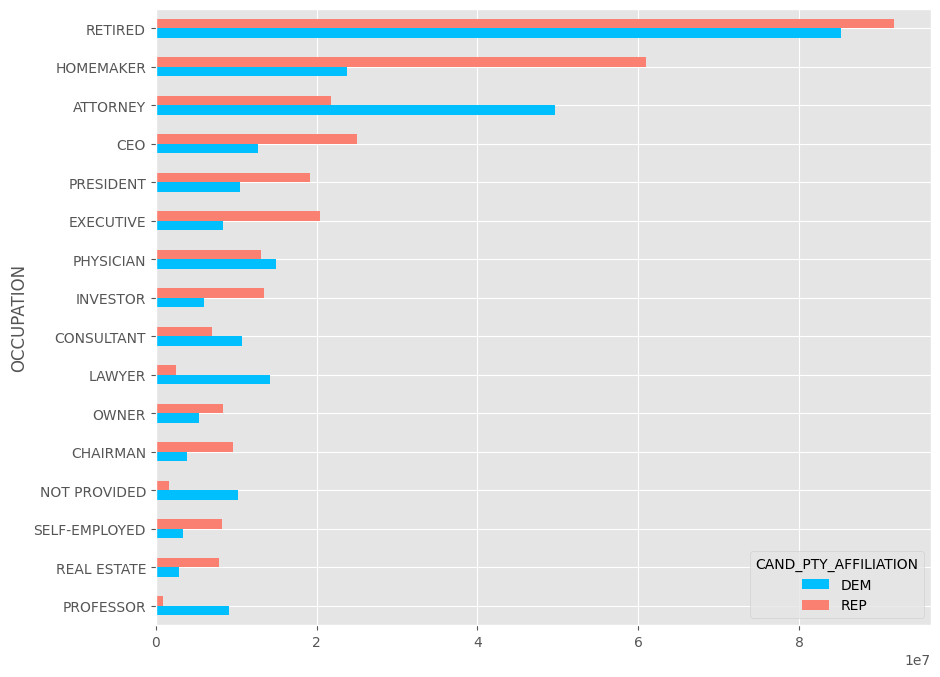

In [31]:
_ = over_10mm.sort_values(by='SUM', ascending=True)[['DEM', 'REP']].\
    plot(kind='barh', color=('deepskyblue', 'salmon'), figsize=(10, 8))

* Μπορεί να έχει ενδιαφέρον να δούμε και ποσοστιαία τις δωρεές ανά επάγγελμα.

* Για να το κάνουμε αυτό θα πρέπει να διαιρέσουμε κάθε στοιχείο των δύο πρώτων στηλών με την τρίτη στήλη (άθροισμα).

* Αφού η διαίρεση θα γίνει από πάνω προς τα κάτω, θα κινηθούμε κατά τον άξονα 0 (`axis=0`).

In [32]:
over_10mm_pct = over_10mm[['DEM', 'REP']].div(over_10mm['SUM'], axis=0)
over_10mm_pct

CAND_PTY_AFFILIATION,DEM,REP
OCCUPATION,,
ATTORNEY,0.694827,0.305173
CEO,0.336699,0.663301
CHAIRMAN,0.283985,0.716015
CONSULTANT,0.605199,0.394801
EXECUTIVE,0.289252,0.710748
HOMEMAKER,0.281072,0.718928
INVESTOR,0.310184,0.689816
LAWYER,0.851161,0.148839
NOT PROVIDED,0.857403,0.142597


* Και το αντίστοιχο διάγραμμα, όπου αφού έχουμε ποσοστά, όλες οι μπάρες αθροίζουν στο ένα.

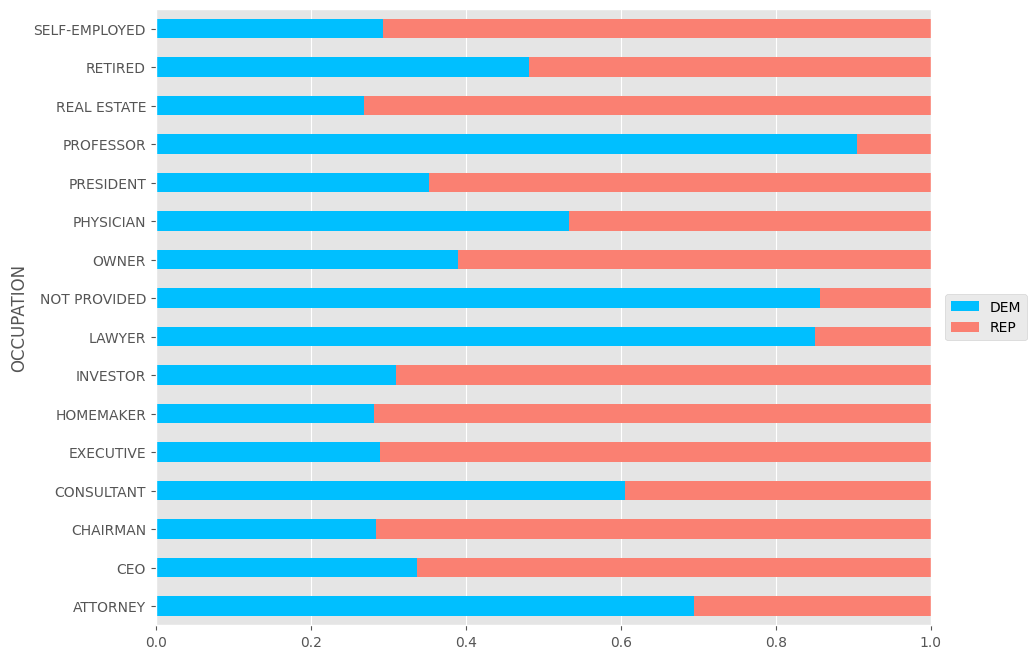

In [33]:
_ = over_10mm_pct.plot(kind='barh', color=('deepskyblue', 'salmon'), stacked=True, figsize=(10, 8))
plt.xlim((0, 1))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))

* Και αφού είδαμε τη σχέση επαγγελμάτων με υποστήριξη σε συγκεκριμένα κόμματα, ας επιστρέψουμε σε ένα πιο βασικό ερώτημα.

* Πόσα χρήματα συγκέντρωσε ο κάθε υποψήφιος;

In [34]:
fec

,CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID,CMTE_NM,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00431445,N,Q1,P2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106502,724196,NaN,NaN,4041920111138175295,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
1,C00431445,N,Q1,G2008,11930701008,22Y,IND,"PORTA, BONNIE",CAPE ELIZABETH,ME,04107,NaN,NaN,03092011,2300.0,NaN,SB28A-106503,724196,NaN,NaN,4041920111138175296,OBAMA FOR AMERICA,P80003338,"OBAMA, BARACK",DEM
2,C00431171,N,Q1,P2008,11930680270,15C,CAN,"ROMNEY, MITT",LEXINGTON,MA,02421,NaN,NaN,03312011,250000.0,P80003353,SA.C01,723744,X,FORGIVENESS OF REMAINING 2008 CAMPAIGN DEBT,4041920111138137387,ROMNEY FOR PRESIDENT INC.,P80003353,"ROMNEY, MITT",REP
3,C00493726,N,TER,O,11030611159,15,IND,"KIRINCIZ, ANTHONY",DIX HILLS,NY,11746,LOGICAL ENERGY PARTNERS,MANAGING MEMBERS,03302011,500.0,NaN,SA06151105121,731329,NaN,NaN,2061720111140911696,STUDENT FOR MITT ROMNEY,P80003353,"ROMNEY, MITT",REP
4,C00494740,A,Q2,P2012,11971580485,15,IND,"PERRY, ROY",AUSTIN,TX,78701,SELF-EMPLOYED,MANAGER/ENGINEER,04302011,1000.0,NaN,C11081512,748092,NaN,NaN,4101820111143686328,OBAMA VICTORY FUND 2012,P80003338,"OBAMA, BARACK",DEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059262,C00431171,A,M10,G2012,14970041655,15,IND,"STIDHAM, ANNA DR.",OKLAHOMA CITY,OK,73170,DIAGNOSTIC IMAGING ASSOCIATES,PHYSICIAN,09292012,250.0,NaN,SA17.3028132,944828,NaN,NaN,4081320141220705368,ROMNEY FOR PRESIDENT INC.,P80003353,"ROMNEY, MITT",REP
1059263,C00431171,A,M10,G2012,14970041656,15,IND,"STIDHAM, SHANE E. DR.",OKLAHOMA CITY,OK,73170,SELF-EMPLOYED,PHYSICIAN,09042012,1000.0,NaN,SA17.2394284,944828,NaN,NaN,4081320141220705370,ROMNEY FOR PRESIDENT INC.,P80003353,"ROMNEY, MITT",REP
1059264,C00431171,A,M10,G2012,14970041656,15,IND,"STIDHAM, SHANE E. DR.",OKLAHOMA CITY,OK,73170,SELF-EMPLOYED,PHYSICIAN,09292012,250.0,NaN,SA17.3028114,944828,NaN,NaN,4081320141220705371,ROMNEY FOR PRESIDENT INC.,P80003353,"ROMNEY, MITT",REP
1059265,C00431171,A,M10,G2012,14970041657,15,IND,"STIDHAM, WOFFORD H. MR.",BARTOW,FL,33830,RETIRED,RETIRED,09292012,500.0,NaN,SA17.3121138,944828,NaN,NaN,4081320141220705372,ROMNEY FOR PRESIDENT INC.,P80003353,"ROMNEY, MITT",REP


In [45]:
fec.groupby('CAND_NAME')['TRANSACTION_AMT'].sum()

CAND_NAME
OBAMA, BARACK    562711400.0
ROMNEY, MITT     659176427.0
Name: TRANSACTION_AMT, dtype: float64

* Αυτό είναι πολύ παράδοξο.

* Ο Mitt Romney φαίνεται να συγκέντρωσε περισσότερα χρήματα από τον Barack Obama.

* Δεν είναι αυτό που περιμέναμε, και επιπλέον δεν είναι αυτό που βρίσκουμε αν ανατρέξουμε σε αναρτήσεις στο διαδίκτυο σε σχέση με τις εκλογές του 2012.

* Συμπέρασμα: *Ελέγξτε και ξανα-ελέγξτε τα δεδομένα σας!* Αλλιώς μπορείτε να πείτε ό,τι θέλετε, να φαίνεται όσο πειστικό θέλετε, αλλά να μην έχει σχέση με την πραγματικότητα.